# **Artificial Neural Networks Project: Street View Housing Number Digit Recognition**



--------------
## **Context** 
--------------

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a feed-forward neural network model that can recognize the digits in the images. 

-------------
## **Dataset**
-------------
We will use a subset of the original data to save some computation time.

## **Importing the necessary libraries**

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import keras

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.9.1


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required

#h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')
h5f = h5py.File('C:/Users/fehri/Documents/MIT/SVHN_single_grey1.h5', 'r')

In [5]:
h5f

<HDF5 file "SVHN_single_grey1.h5" (mode r)>

In [6]:
# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [7]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

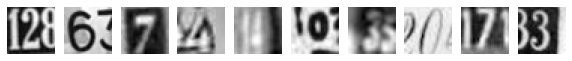

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- We will print the shape and the array of pixels for the first image in the training dataset.
- We will reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- We will normalize the train and the test dataset by dividing by 255.
- We will print the new shapes of the train and the test dataset.
- We will One-hot encode the target variable.

In [9]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [10]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 4D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### Normalize the train and the test data.**

In [11]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255

X_test = X_test/255

In [12]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [13]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [14]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### Building and training an ANN model 

In [15]:
# Crete a Sequential Object
model = Sequential()

# Add first layer with 64 neurons to the sequental object
model.add(Dense(64, input_shape = (1024, ), activation = 'relu'))

# Add second layer with 32 neurons to the sequental object
model.add(Dense(32, activation = 'relu'))

# Output layer with 10 neurons as it has 10 classes
model.add(Dense(10, activation = 'softmax'))

In [16]:
# Define the model

def nn_model_1():

    model = Sequential() 

    # Add layers as per the architecture mentioned above in the same sequence
    
    # Add first layer with 64 neurons to the sequental object
    model.add(Dense(64, input_shape = (1024, ), activation = 'relu'))

    # Add second layer with 32 neurons to the sequental object
    model.add(Dense(32, activation = 'relu'))

    # Output layer with 10 neurons as it has 10 classes
    model.add(Dense(10, activation = 'softmax'))
      
    # Compile the model
    
    opt = keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = opt)
    return model

In [17]:
# Build the model

model_1 = nn_model_1()

In [18]:
# Print the summary

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Set the number of epochs for training
num_epochs = 20

# Set the batch size for training
batch_size = 128


# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2,epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/20
263/263 [==============================] - 1s 2ms/step - loss: 2.2968 - accuracy: 0.1121 - val_loss: 2.2641 - val_accuracy: 0.1365
Epoch 2/20
263/263 [==============================] - 0s 2ms/step - loss: 2.1260 - accuracy: 0.2057 - val_loss: 1.9909 - val_accuracy: 0.2689
Epoch 3/20
263/263 [==============================] - 0s 2ms/step - loss: 1.8549 - accuracy: 0.3374 - val_loss: 1.6914 - val_accuracy: 0.4063
Epoch 4/20
263/263 [==============================] - 0s 2ms/step - loss: 1.6149 - accuracy: 0.4441 - val_loss: 1.5213 - val_accuracy: 0.5030
Epoch 5/20
263/263 [==============================] - 0s 2ms/step - loss: 1.4542 - accuracy: 0.5205 - val_loss: 1.3888 - val_accuracy: 0.5531
Epoch 6/20
263/263 [==============================] - 0s 2ms/step - loss: 1.3439 - accuracy: 0.5644 - val_loss: 1.3188 - val_accuracy: 0.5838
Epoch 7/20
263/263 [==============================] - 0s 1ms/step - loss: 1.2769 - accuracy: 0.5920 - val_loss: 1.2608 - val_accuracy: 0.6062
Epoch 

### **Plotting the validation and training accuracies**

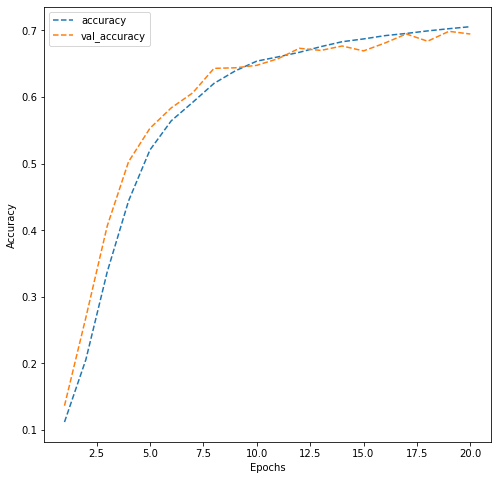

In [24]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()


plt.show()


**Observations:**
- The training and the validation accuray are both low, for a max of a little under 0.7 at 20 epochs. 
- After ~ 10 epochs, there is minimum increase in accuracy.
- the training and validation accuracy are both similar. 

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [25]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [26]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### Second model architecture

In [27]:
# Define the model

def nn_model_2():

    model = Sequential() 

    # Add layers as per the architecture mentioned above in the same sequence
    
    # Add first layer with 256 neurons to the sequental object
    model.add(Dense(256, input_shape = (1024, ), activation = 'relu'))

    # Add second layer with 32 neurons to the sequental object
    model.add(Dense(128, activation = 'relu'))
    
    #Add a Dropout layer with the rate equal to 0.2
    model.add(Dropout(0.2))

    # Add third layer with 64 neurons to the sequental object
    model.add(Dense(64, activation = 'relu'))
    
    # Add fourth layer with 64 neurons to the sequental object
    model.add(Dense(64, activation = 'relu'))
    
    # Add fifth layer with 32 neurons to the sequental object
    model.add(Dense(32, activation = 'relu'))
    
    #Add the BatchNormalization layer
    model.add(BatchNormalization())
    
    # Output layer with 10 neurons as it has 10 classes
    model.add(Dense(10, activation = 'softmax'))
      
    # Compile the model
    
    opt = keras.optimizers.Adam(learning_rate=0.0005)

    model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = opt)
    return model

In [28]:
# Build the model

model_2 = nn_model_2()

In [29]:
# Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [30]:

# Set the number of epochs for training
num_epochs = 30

# Set the batch size for training
batch_size = 128

# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2,epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/30
263/263 [==============================] - 2s 4ms/step - loss: 2.3438 - accuracy: 0.1080 - val_loss: 2.2770 - val_accuracy: 0.1435
Epoch 2/30
263/263 [==============================] - 1s 3ms/step - loss: 2.0684 - accuracy: 0.2355 - val_loss: 1.8767 - val_accuracy: 0.3232
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 1.6271 - accuracy: 0.4410 - val_loss: 1.4663 - val_accuracy: 0.5105
Epoch 4/30
263/263 [==============================] - 1s 3ms/step - loss: 1.3973 - accuracy: 0.5280 - val_loss: 1.2799 - val_accuracy: 0.5868
Epoch 5/30
263/263 [==============================] - 1s 3ms/step - loss: 1.2370 - accuracy: 0.5993 - val_loss: 1.1035 - val_accuracy: 0.6604
Epoch 6/30
263/263 [==============================] - 1s 3ms/step - loss: 1.1467 - accuracy: 0.6335 - val_loss: 1.1125 - val_accuracy: 0.6354
Epoch 7/30
263/263 [==============================] - 1s 4ms/step - loss: 1.0922 - accuracy: 0.6501 - val_loss: 1.0395 - val_accuracy: 0.6668
Epoch 

### **Plotting the validation and training accuracies**

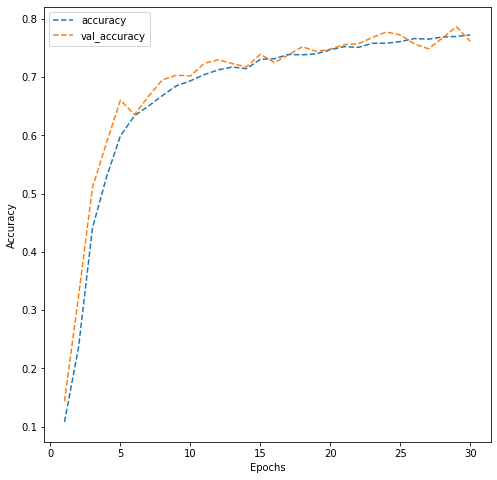

In [31]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- The training and validation accuracy are both improved, for a max of ~ 0.75 at 30 epochs.
- There is a minimum increase in accuracy after 20 epochs.
- The training and validation accuracy are both very similar, which makes overfitting of the training data less likely. 

## **Predictions on the test data**


In [32]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 1ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [33]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### Printing  the classification report and the confusion matrix for the test predictions.

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1814
           1       0.78      0.82      0.80      1828
           2       0.81      0.79      0.80      1803
           3       0.81      0.66      0.73      1719
           4       0.76      0.83      0.79      1812
           5       0.64      0.79      0.71      1768
           6       0.72      0.75      0.74      1832
           7       0.86      0.77      0.81      1808
           8       0.70      0.72      0.71      1812
           9       0.76      0.75      0.76      1804

    accuracy                           0.76     18000
   macro avg       0.77      0.76      0.76     18000
weighted avg       0.77      0.76      0.76     18000



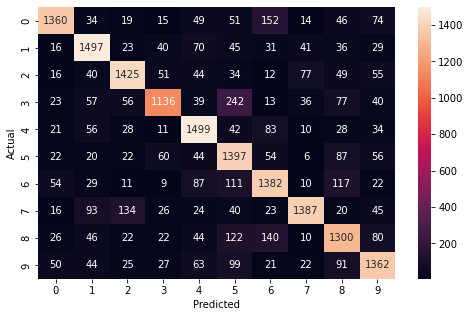

In [35]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix([int(x)for x in y_test], test_pred)    
#Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
- The precision is better for certain digits (86% for the digit 7, 85% for the digit 0, 81% for the digit 2 and 3). For the digit 5, the precision is low, with only 64%. This means that from all the digits that the model classfied as the digit 5, only 64% were correct.  
- The recall also depends on the digit, with a higher recall for the digit 4 and 1 ( 83%, and 82%). The digit 3 has a low recall, with only 66%. This means that from all the actual digit 3, the model only identifies 66% of them.  The recall has a high range which implies that the model is good at identifying some objects while poor at identifying some other objects. For example, the model can identify more than 83% of 4 digits but can identify only ~ 66% of 3s.
- The model is confused between the digit 3 and the digit 5. 
- The overall precision and recall of the model is arount 76-77%, as is the F1 score. It is overall a good model, but not great, especially for certain digits. 
- The model has a 77% accuracy which is comparable to the validation accuracy. 